# Evaluation of Multilingual Information Retrieval Methodology

Multilingual Information Retrieval is a rapidly expanding field which amalgamates the fields of information retrieval, a traditionally brutish task, and translation which is a well-developed domain of natural language processing typically involving machine learning models. Recently, word embeddings have been increasingly adopted as a computationally efficient model in both fields with stellar results. Even without crosslingual dictionaries or parallel data, unsupervised machine learning models have shown consistently strong performance in translation tasks(Grave et. al, 2018)(Conneau et. al, 2018). By employing these models to create aligned bilingual word embeddings (_BWE_), cross-lingual information retrieval tasks have shown significant improvements (Litschko et. al, 2018).

Standing on the shoulders of giants, we look to further refine the task of crosslingual information retrieval with the following objectives in mind:

1. Expanding Crosslingual Information Retrieval (CLIR) tasks (source to target language) to Multilingual Information Retrieval (MLIR) tasks (source to source and target language).
2. Augmenting the methodology proposed by Litschko et. al to generate enhanced models for information retrieval.
3. (Extension): Employing LSTM/Attention models to enhance document parsing.

Lastly, we look to better evaluate the accuracy of our multilingual information retrieval task which can be set as a strong baseline as a performance indicator and metric.

## Expanding CLIR to MLIR

Expanding on typical CLIR models, we hope to explore possible methods of implementing MLIR. The difference beween the two concerns the target language of a seaarch query. For CLIR, we have an intended target language while MLIR includes the co-existence of retrieving documents over multiple languages including the source language. This greatly increases the complexity of MLIR over CLIR (P. Sorg, P. Cimiano, 2012).

Sorg and Cimiano raise two typical issues faced in MLIR, termed the _language bias type 1_ and _type 2_. The former includes a bias to return results in the language of the source query. Even in a cross-lingual vector space, there may be slight tendencies when employing cross-lingual vectors as the vectors in the source language tend to be similar than of a different language. In BWE models employed by Litschko et. al, their method of vector addition creates some noise which significantly reduces the inherent _type 1 language bias_. It will be noted for future extensions that NLP models centered around non-vector methods will be more susceptible to this bias due to the intermediary step of translation.

_Type 2 language bias_ stems from statistical bias that prefers languages with larger document corpora. In BWE models, a larger document collection would generate more document vectors that populate the vector space more densely, thereby increasing the likelihood of picking these documents as nearest neighbours. Artificial introduction of limitations on retrieval results will have to be implemented (like an affirmative action policy) to balance bias and accuracy. One such way that is incorporated to reduce the density of documents in the word vector space is to multiply distance/cosine similarity results by a factor of `1/lgN` where N is the size of the langauge's document corpora.

![abc](1.jpg)

In the simulated vector space above, we have to discriminate against the dense red triangle vectors as they tend to be closer to an average query by virtue of size of their corpora. As such, we divide this by lgN to receive a slightly less biased result.

## Augmenting BWE IR models

Machine-learn an ensemble?

## Employing additional NLP models in document parsing

WIP

## Determining accuracy through Half-K recall and Mean Squared Cosine Similarity (MSCS)

In the evaluation of complex Information Retrieval tasks, accuracy is typically evaluated using an arbitrary precision estimator of mean cosine similarity, such as through mean average precision (Litschko, 2018). While this rewards models that are already well performing, it is inherently biased when results are spread out. To explain the precision and recall metric, we shall first define a few terms.

- Ranked relevance list: A sorted list producing descending results from \[0,1\], typically derived from cosine similarity using a dot product of normal vectors
- Lambda(λ): An arbitrary threshold that classifies results from the ranked relvance list. Results ≥ λ are classified as relevant (positive results) while those ≤ lambda are classified as irrelevant (negative results)
- Precision: The probability that results retrieved are relevant i.e. `P({Relevant Retrieved Results}|{Retrieved Results})`
- Recall: The probability that relevant results are retrieved i.e. `P({Relevant Retrieved Results}|{Relevant Results})`

### Improving Precision Indicator

In Litschko's paper, he uses mean cosine similarity to determine precision. Here, given an assumption about our ranked relevance list, we shall prove that mean squared cosine similarity (MSCS) would be a strong precision indicator.

#### Assumption: The mean cosine similarity (μ) is less than λ.

This assumption hinges upon two concepts, one theoretical and one observed. In a typical ranked relevance list (calculated using cosine similarity of vectors), the results roughly approximate a graph of inverse sub-linear proportionality (1/x^i where i<1) due to the density of vectors in a 300-dimension vector space. This results in a ranked relevance list with exponentially decreasing relevance creating a tail-heavy list. This generally tends to a smaller mean μ, especially for a long ranked relevance list. Moreover, it is observed that CLIR tasks seldom perform above μ = 0.4 (Litschko et. al, 2018). Given that a relevant result typically has λ > 0.5, we can indeed assume that μ < λ.

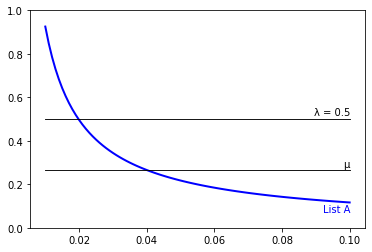

In [55]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 0.1, 0.001)
z = (1/(x**.9))/25*(0.599045/1.63371)
s = 0*x + 6.6560556/25
c = 0*x + 0.5

line1, line2, line3 = plt.plot(x,z,lw=2, color = 'b'), plt.plot(x,s,lw=0.9, color = 'k'), plt.plot(x,c,lw=0.9, color = 'k')
plt.text(0.092, 0.07, 'List A', color = 'b')
plt.text(0.098, 0.28, 'μ', color = 'k')
plt.text(0.0895, 0.52, 'λ = 0.5', color = 'k')
plt.ylim(0,1)
plt.show()

#### MSCS performs better than mean cosine similarity in rewarding lists with more relevant results.

**Proof:** Given 2 ranked relevance lists `A` and `B` with results `{a_i for i in range(n)}` and `{b_i for i in range(n)}` such that they are descendingly sorted (i.e. `a_i > a_j for i < j`) and that A has more results that are relevant (`for a_i ≥ λ ≥ a_(i+1)` and `for b_j ≥ λ ≥ b_(j+1)` then `i > j`), we can approximate `A` and `B` to continuous functions of inverse sub-linear proportionality.

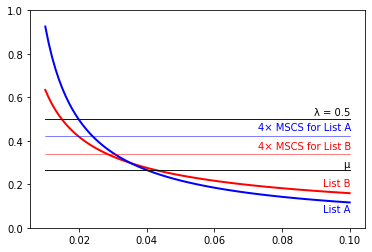

In [63]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 0.1, 0.001)
y = (1/(x**.6))/25
z = (1/(x**.9))/25*(0.599045/1.63371)
s = 0*x + 6.6560556/25
a = 0*x + sum(y**2)*0.004/(0.1-0.01)
b = 0*x + sum(z**2)*0.004/(0.1-0.01)
c = 0*x + 0.5

line1, line2, line3 = plt.plot(x,y,lw=2, color = 'r'), plt.plot(x,z,lw=2, color = 'b'), plt.plot(x,s,lw=0.9, color = 'k')
line4, line5, line6 = plt.plot(x,a,lw=0.5, color = 'r'), plt.plot(x,b,lw=0.5, color = 'b'), plt.plot(x,c,lw=0.9, color = 'k')
plt.text(0.092, 0.07, 'List A', color = 'b')
plt.text(0.092, 0.19, 'List B', color = 'r')
plt.text(0.098, 0.28, 'μ', color = 'k')
plt.text(0.0895, 0.52, 'λ = 0.5', color = 'k')
plt.text(0.073, 0.45, '4× MSCS for List A', color = 'b')
plt.text(0.073, 0.36, '4× MSCS for List B', color = 'r')
plt.ylim(0,1)
plt.show()

In the above 2 ranked relevance lists, we can see that in cases where List A produces more results that are relevant, it will produce a greater MSCS. This can be attributed to a statistical phenomenon. For two distributions with mean `μ`, and `λ > μ`, if Distribution A has more results greater than `λ`, then Distribution A has a greater Variance. i.e. `Var(A) > Var(B)`. This is equivalent to `E(A^2) - E(A)^2 > E(B^2)- E(B)^2`. Since `E(A) = E(B) = μ`, we have `E(A^2) > E(B^2)` which is as required.

As such, the precision indicator using MSCS will typically generate clearer results than a standard mean cosine similarity in determining the precision of results from a Information Retrieval task.

### Establishing Half-K Recall Indicator for IR tasks

Typically, in a standard IR setting, it is difficult to determine the recall of an IR task due to the varying sizes of relevant results in the list of all documents. It remains a computationally demanding challenge to classify all true relevant results as it requires passing through all documents. To develop an indicator that can suitably estimate recall, we shall propose the Half-K recall estimator.

Taking a step back, we first take a look at how humans look at the relevance of search results. When we receive search results, say on Google or another search engine, we quickly glance through the metadata (title, author, date, etc.) of the document to verify its relevance. We can use emulate this to determine recall, thereby reducing the computational load when passing through all documents. In my project, I will use the title as the sole meta-data to determine relevance as the title is often an accurate summary of the contents of the document.

Given an IR task that returns the top K results through nearest neighbours, we will also independently determine the top 0.5K results using the metadata (i.e. title) with a similar calculation between the query and all documents. We will then estimate `Recall ≈ 2*P({Metadata Results} ∩ {Nearest Neighbour Results} | {Metadata Results})`. Here, the `0.5` constant is arbitrarily set to balance between the nuances of overfitting and high space complexity (high constant) and inaccurate estimation due to insufficient data (low constant).

## Citations and Stuff

#### Dependencies:
- Python 3.7.4, run on Anaconda 2019.10, with the following modules: NumPy 1.16.5, 
- [**FastText**](https://github.com/facebookresearch/fastText) for Multilingual word embeddings. (installed)
- [**SpaCy**](https://github.com/explosion/spaCy) for Natural Language Processing (NLP) toolkit in English (en). `pip install spacy && python -m spacy download en_core_web_md`
- [**jieba**](https://github.com/fxsjy/jieba) for NLP toolkit in Simplified-Chinese (zh). `pip install jieba`
- [**malaya**](https://github.com/huseinzol05/Malaya) for NLP toolkit in Bahasa Melayu (ms). `pip install malaya`
- [**HindiTokenizer**](https://github.com/taranjeet/hindi-tokenizer) for NLP tooklit in Indic Languages (hi, ta). (installed)
- **SciPy's KDTrees** for basic nearest neighbours search.
- [**googletrans**](https://pypi.org/project/googletrans/) as Machine Translation (MT) and Language detection toolkit. `pip install googletrans`

The data provided is built with:
- [**ConceptNet Numberbatch's**](https://github.com/commonsense/conceptnet-numberbatch) multilingual word embeddings. This data contains semantic vectors from ConceptNet Numberbatch, by Luminoso Technologies, Inc. You may redistribute or modify the data under the terms of the CC-By-SA 4.0 license.
- Web-crawled data-set from Singapore-based newspapers: The Straits Times (en), Lianhe Zaobao (zh), Berita Harian (ms) and Tamil Murasu (ta).


#### References:  
###### Introduction
1. Klavans, J. and E. Hovy. (editor) 1999. [Multilingual Information Management](https://www.cs.cmu.edu/~ref/mlim/chapter2.html)  
2. Grefenstette, G. (editor) 1998. Cross-Language Information Retrieval.  

3. Sorg, P. and P. Cimiano. 2012. [Exploiting Wikipedia for cross-lingual and multilingual information retrieval](https://www.researchgate.net/publication/257026046_Exploiting_Wikipedia_for_cross-lingual_and_multilingual_information_retrieval)
4. Gabrilovich, E., S. Markovitch. 2007. Computing semantic relatedness using wikipedia-based explicit semantic analysis, Proceedings of the 20th International Joint Conference on Artificial Intelligence (IJCAI), pp. 1606–1611.

##### Methods in Mulitilingual Information Retrieval

5. Bojanowski, P.\*, E. Grave\*, A. Joulin, T. Mikolov. 2017. [Enriching Word Vectors with Subword Information](https://arxiv.org/abs/1607.04606)  

6. Tsai, M.-F., H.-H. Chen, Y.-T., Wang. 2010. [Learning a merge model for multilingual information retrieval](https://www.researchgate.net/publication/220229367_Learning_a_merge_model_for_multilingual_information_retrieval)
7. Lin, W.-C. and H.-H. Chen. 2003. [Merging mechanisms in multilingual information retrieval. Lecture Notes in Computer Science, LNCS, 2785, 175–186](https://link.springer.com/chapter/10.1007/978-3-540-45237-9_14)
8. Rahimi, R., A. Shakery, I. King. 2015. [Multilingual information retrieval in the language
modeling framework](https://dl.acm.org/doi/10.1007/s10791-015-9255-1)

9. Litschko, R., G. Glavaš, S. Ponzetto, I. Vulić. 2018. [Unsupervised Cross-Lingual Information Retrieval
using Monolingual Data Only](https://arxiv.org/pdf/1805.00879.pdf)

10. Conneau*, A., G. Lample*, M. Ranzato, L. Denoyer, H. Jégou. 2018. [Word Translation without Parallel Data](https://arxiv.org/pdf/1710.04087.pdf)


##### Performance Evaluation
7. Korra, R., P. Sujatha, S. Chetana, M. Kumar. 2011. [Performance Evaluation of Multilingual Information
Retrieval (MLIR) System over Information Retrieval
(IR) System](https://www.researchgate.net/publication/233916375_Performance_Evaluation_of_Multilingual_Information_Retrieval_MLIR_System_over_Information_Retrieval_IR_System)
8. Dasdan, A., K. Tsioutsiouliklis, E. Velipasaoglu. 2009. [Web Search Engine Metrics for Measuring User Satisfaction, Tutorial @ 18th International World Wide Web Conference.](http://www.dasdan.net/ali/www2009/web-search-metrics-tutorial-www09-parts0-5.pdf)


#### Related Work:  
Manning, C., P. Raghavan, H. Schütze. 2009. [Introduction to Information Retrieval](https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf)  
Speer R., J. Chin, C. Havasi. 2017. [ConceptNet 5.5: An Open Multilingual Graph of General Knowledge, in proceedings of AAAI 2017.](http://aaai.org/ocs/index.php/AAAI/AAAI17/paper/view/14972)


#### What I used from references

Klavans (1999): 
- Highlights technical issues and expected bottlenecks for MLIR, raised by Grefensette (1998) and Klavans (1999).  

Sorg (2012):  
- Introduces the Bag-of-Concepts model in interlingual concept space as an expansion of traditional Bag-of-Words in Monolingual IR adapted from Gabrilovich and Markovitch's (2007) work on explicit semantic analysis.  
- Differentiates CLIR from MLIR, with the latter being significantly more complex due to the numerous target languages (compared to 1).  
- Qualifies two biases, here by known as Query Bias (a tendency to return documents in the query language) and Quantity Bias (a tendency to preferentially rank documents from the largest collection).  
- Exemplifies concerns of mistake propagation due to the multi-step procedure of IR in a multilingual setting

Bojanowski and Grave (2017):
 nil

Tsai, Chen and Wang (2010):
- Exemplifies and augments current methods of merging monolingual results lists into a multilingual results list. Here, we incorporate methods of normalizing by top-k proposed in Lin, Chen (2003) to implement our multilingual list, which is an improvement over raw score merging, round-robin merging (interleaving results by respective ranks) and top-1 normalizing (dividing by score of best result). This will be shown to reduce both query and quantity biases. In the normalizing by top-k method, the scores are divided by the average of the top-k ranking documents of each monolingual list to return a more representatively sorted list of documents. (essentially a top-2l thing)

Litschko et. al (2018):
- Provides the basis for Bilingual Word Embeddings as a form of vectorising query and documents in a vector space. BWE-Agg-Add and BWE-Agg-IDF as main modes of vectorising documents. Uses MAP to evaluate precision.

Conneau and Lample (2018):
- Denotes and shows how word embeddings in a multilingual vector space can be trained and provides implementation to train by oneself.

Korra, Chetana and Kumar (2011):
- Provides Average Precision (AP) and Mean Average Precision (MAP) as competitive indicators to evaluate precision for a information retrieval task in a Multilingual Setting. 


